In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

def dnn_epoch_50(X_train,y_train, layer, unit):
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2022)
    tf.random.set_seed(2022)
    initializer = tf.keras.initializers.GlorotUniform(seed=42)
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, baseline=0.9)
    check_point = ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',save_best_only=True)
    
    model = Sequential(name='DNN')
    model.add(Dense(unit, input_shape = (X_train.shape[1],), activation='relu', kernel_initializer=initializer, name = 'Input_layer'))
    for i in range(layer):
        model.add(Dense(unit, activation='relu', kernel_initializer=initializer))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer, name='Output_layer'))
    
    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics='accuracy')
    model.summary()
    
    model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping,check_point])
    
    best_model = load_model('best_model.h5') 
    
    return best_model



def dnn_epoch_100(X_train,y_train, layer, unit):
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2022)
    tf.random.set_seed(2022)
    initializer = tf.keras.initializers.GlorotUniform(seed=42)
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, baseline=0.9)
    check_point = ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',save_best_only=True)
    
    model = Sequential(name='DNN')
    model.add(Dense(unit, input_shape = (X_train.shape[1],), activation='relu', kernel_initializer=initializer, name = 'Input_layer'))
    for i in range(layer):
        model.add(Dense(unit, activation='relu', kernel_initializer=initializer))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer, name='Output_layer'))
    
    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics='accuracy')
    model.summary()
    
    model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping,check_point])
    
    best_model = load_model('best_model.h5') 
    
    return best_model
    
    




importing Jupyter notebook from preprocessing.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 

[IterativeImputer] Ending imputation round 7/20, elapsed time 163.31
[IterativeImputer] Change: 5801.693231216942, scaled tolerance: 16508.0 
[IterativeImputer] Early stopping criterion reached.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143983 entries, 0 to 143982
Data columns (total 64 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   loan_amount                         143983 non-null  float64
 1   rate_of_interest                    143983 non-null  float64
 2   Interest_rate_spread                143983 non-null  float64
 3   Upfront_charges                     143983 non-null  float64
 4   term                                143983 non-null  float64
 5   property_value                      143983 non-null  float64
 6   income                              143983 non-null  float64
 7   Credit_Score                        143983 non-null  float64
 8   LTV                          

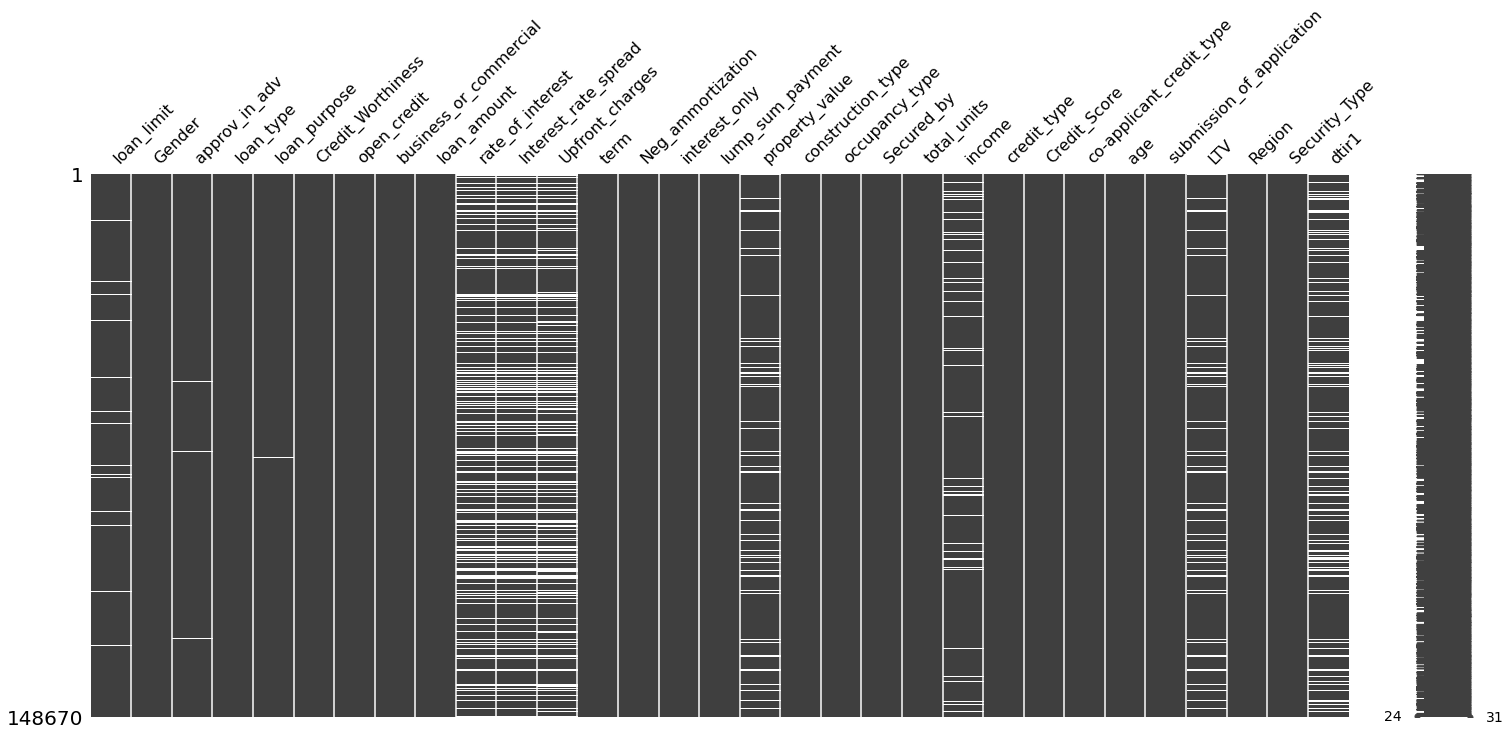

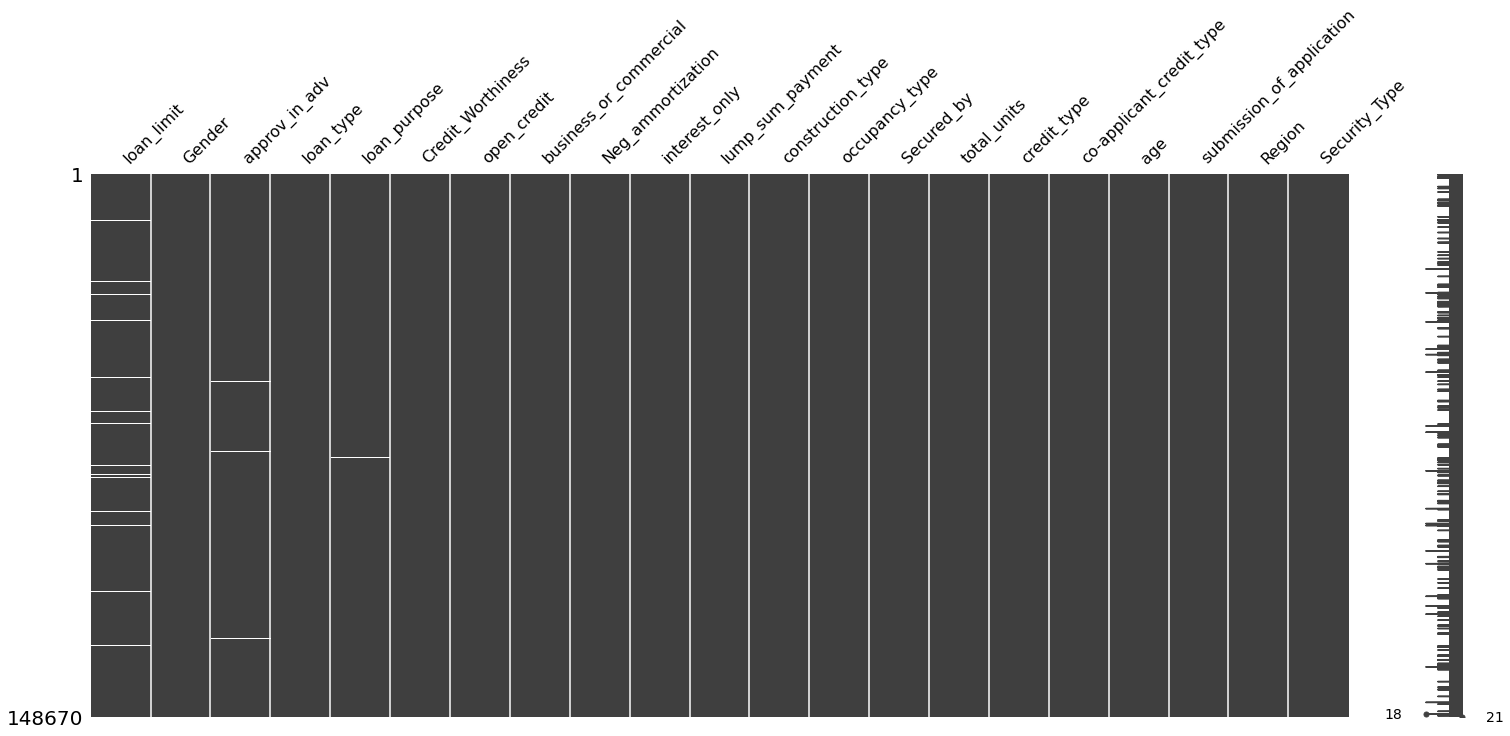

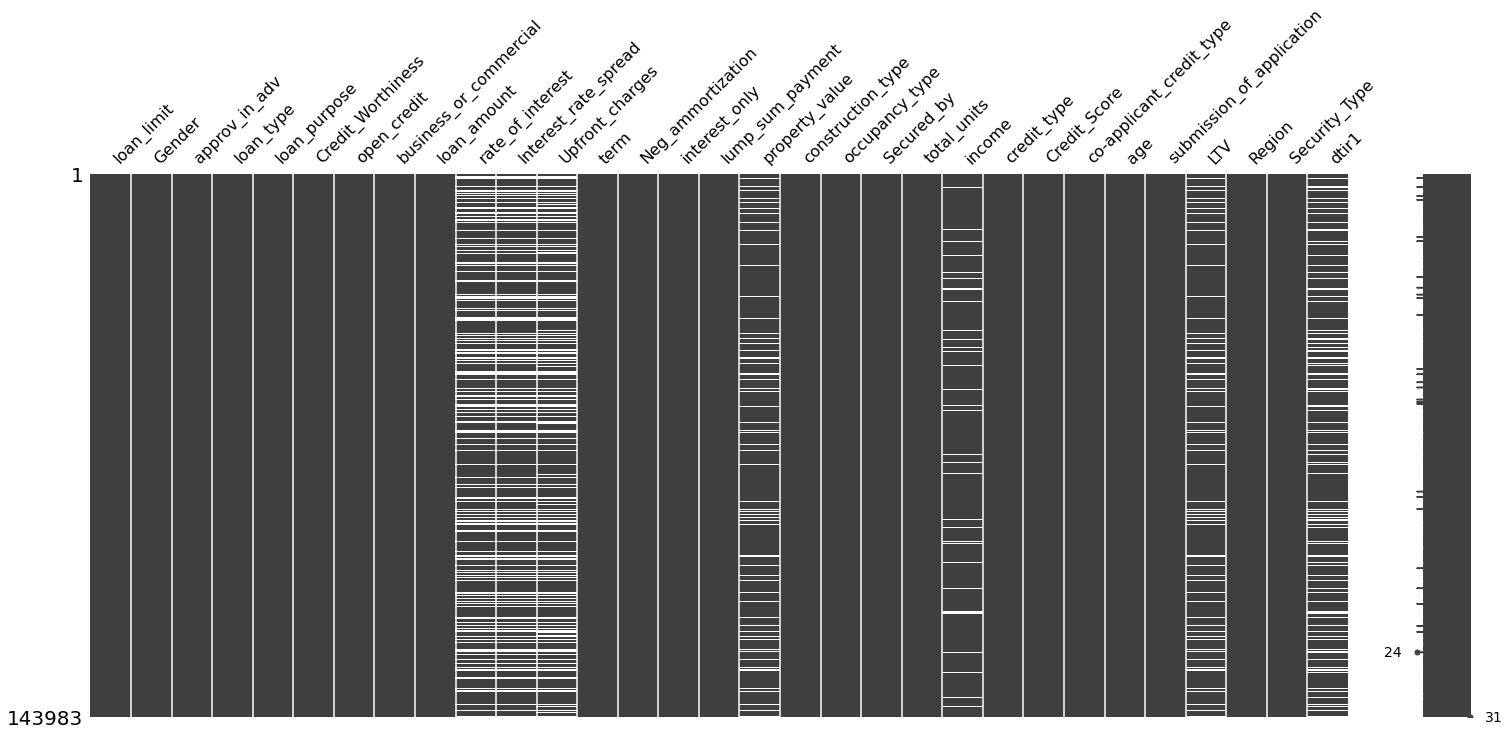

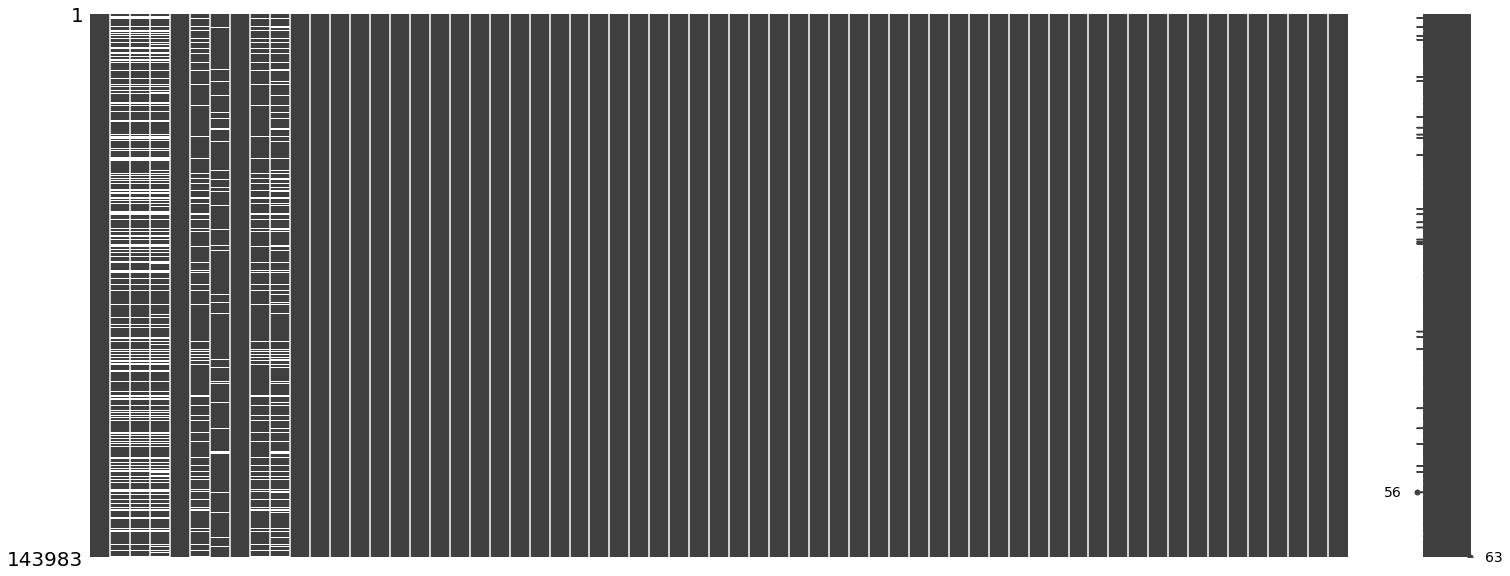

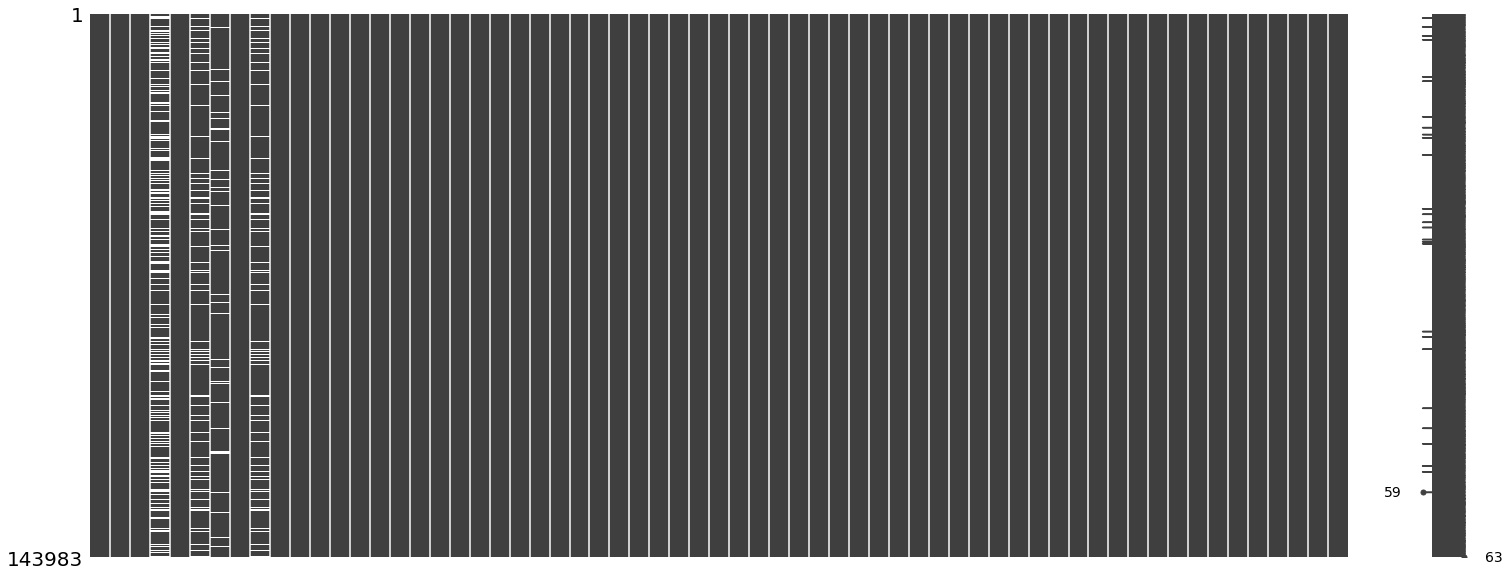

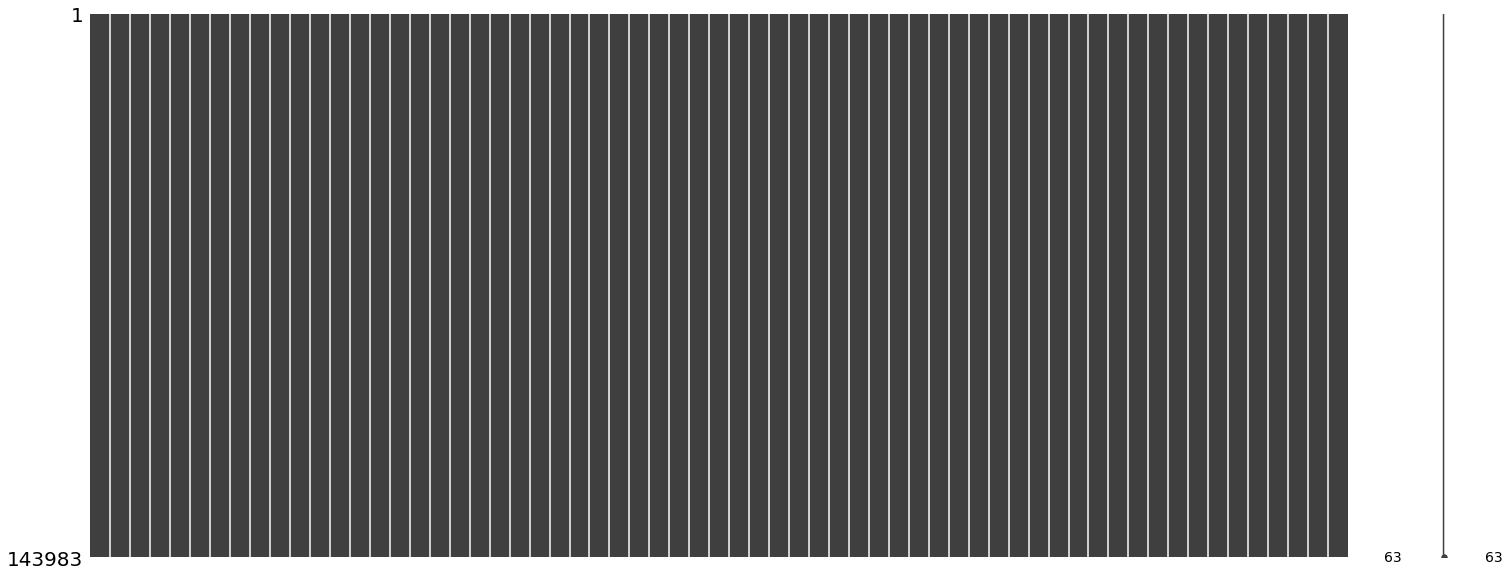

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from keras.callbacks import EarlyStopping

import import_ipynb
from preprocessing import load_data

import warnings
warnings.filterwarnings('ignore')

[IterativeImputer] Completing matrix with shape (143983, 63)
[IterativeImputer] Ending imputation round 1/20, elapsed time 23.17
[IterativeImputer] Change: 4339717.718181094, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 2/20, elapsed time 46.95
[IterativeImputer] Change: 109178.47470880038, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 3/20, elapsed time 70.06
[IterativeImputer] Change: 61326.23123346872, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 4/20, elapsed time 93.81
[IterativeImputer] Change: 47768.54785551413, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 5/20, elapsed time 116.72
[IterativeImputer] Change: 34219.36235358618, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 6/20, elapsed time 140.74
[IterativeImputer] Change: 22454.16177676722, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 7/20, elapsed time 164.29
[IterativeImputer] Ch

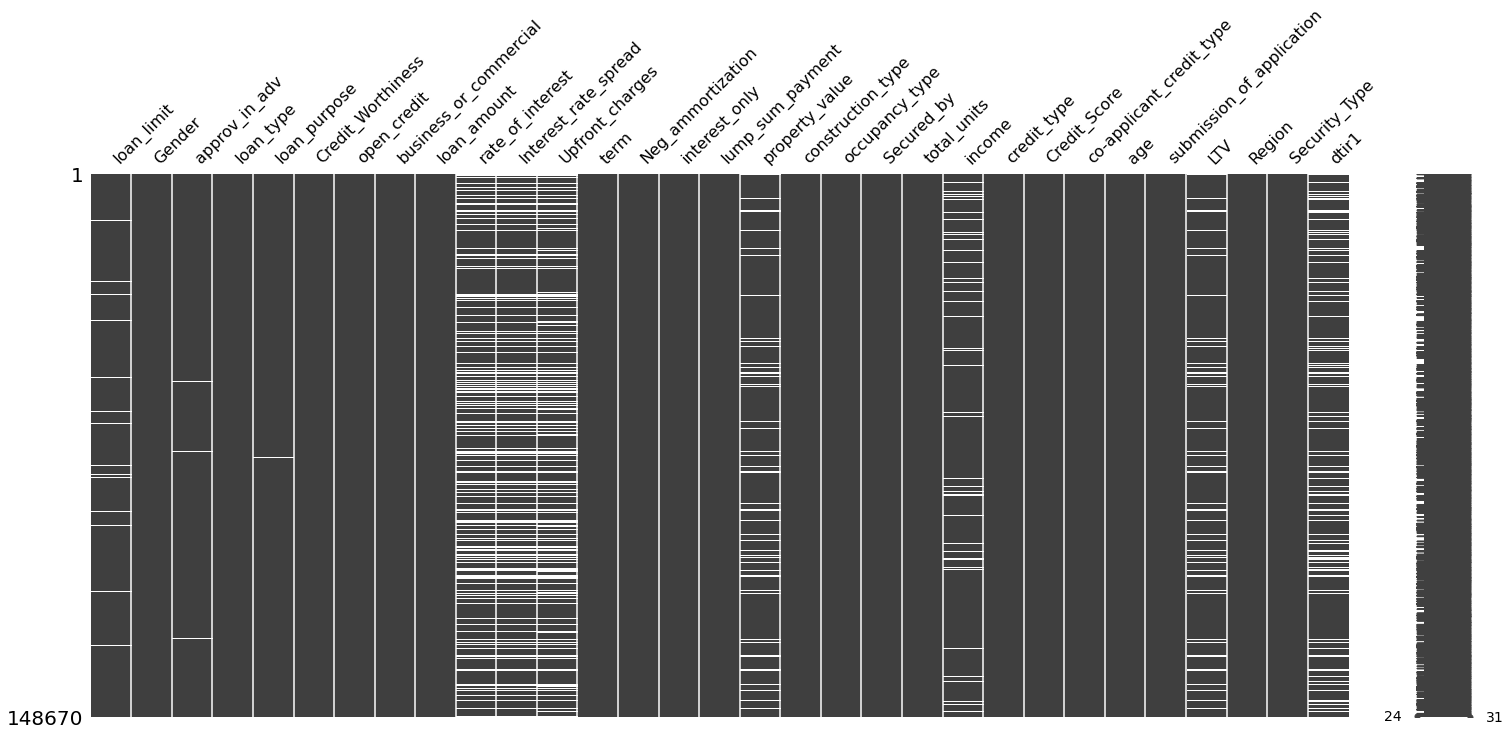

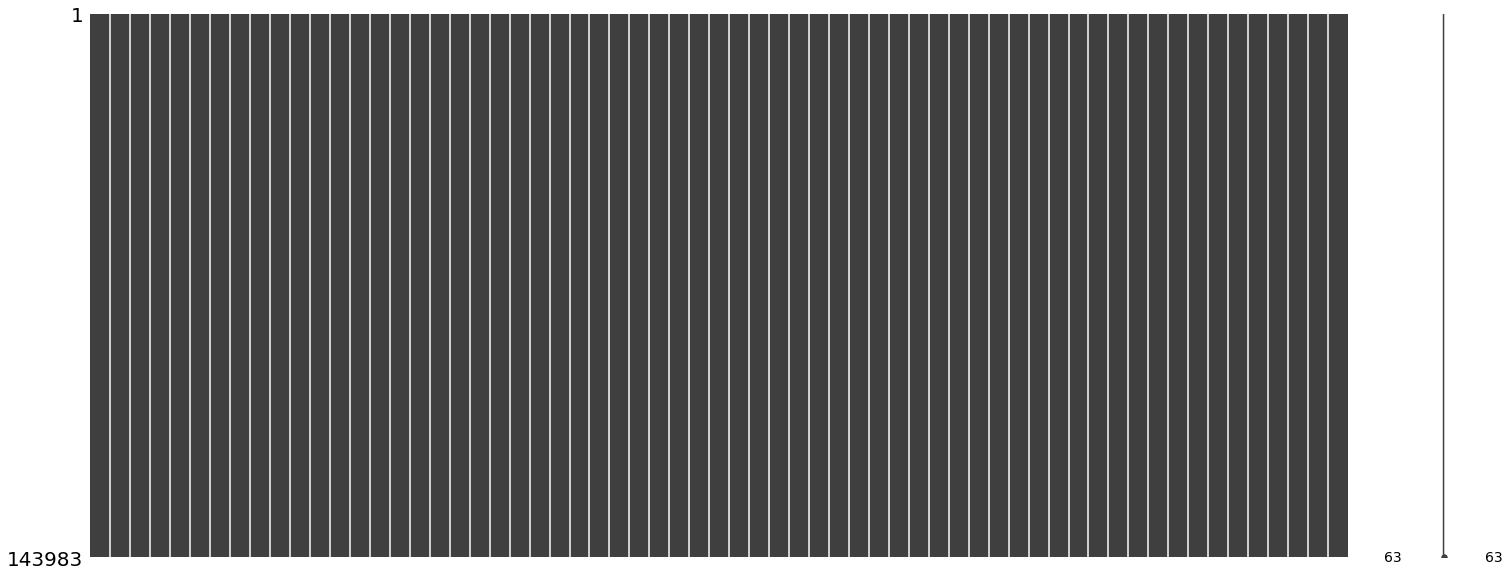

In [3]:
data, target = load_data('data/Loan_Default.csv')
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=2022)

In [9]:
list1 = [100, 200, 300, 400, 500]
list2 = []
for i in range(1,5): 
    for j in list1:
        DNN_model = dnn_epoch_100(x_train, y_train, i, j)
        pred = DNN_model.predict(x_test)
        bin_pred = tf.round(pred).numpy().flatten()
        list2.append([i, j, f1_score(y_test, bin_pred)])

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               6400      
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 16,601
Trainable params: 16,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
675/675 [==============================] - 7s 9ms/step - loss: 1.8900 - accuracy: 0.6493 - val_loss: 0.7827 - val_accuracy: 0.7652
Epoch 2/100
675/675 [==============================] - 6s 9ms/step - loss: 0.7618 - accuracy: 0.7456 - val_loss: 0.9942 - val_accuracy: 0.7621
Epoch 3/100
675/675 [================

675/675 [==============================] - 6s 9ms/step - loss: 0.1882 - accuracy: 0.9124 - val_loss: 0.1669 - val_accuracy: 0.9241
Epoch 23/100
675/675 [==============================] - 6s 9ms/step - loss: 0.1789 - accuracy: 0.9169 - val_loss: 0.1818 - val_accuracy: 0.9079
Epoch 24/100
675/675 [==============================] - 6s 9ms/step - loss: 0.1694 - accuracy: 0.9194 - val_loss: 0.1657 - val_accuracy: 0.9208
Epoch 25/100
675/675 [==============================] - 6s 9ms/step - loss: 0.1669 - accuracy: 0.9204 - val_loss: 0.1547 - val_accuracy: 0.9323
Epoch 26/100
675/675 [==============================] - 6s 9ms/step - loss: 0.1573 - accuracy: 0.9251 - val_loss: 0.1639 - val_accuracy: 0.9299
Epoch 27/100
675/675 [==============================] - 6s 9ms/step - loss: 0.1549 - accuracy: 0.9253 - val_loss: 0.1368 - val_accuracy: 0.9452
Epoch 28/100
675/675 [==============================] - 6s 9ms/step - loss: 0.1534 - accuracy: 0.9260 - val_loss: 0.1530 - val_accuracy: 0.9320
Epoch

Epoch 3/100
675/675 [==============================] - 6s 9ms/step - loss: 0.4866 - accuracy: 0.8258 - val_loss: 0.6374 - val_accuracy: 0.6195
Epoch 4/100
675/675 [==============================] - 6s 9ms/step - loss: 0.4110 - accuracy: 0.8485 - val_loss: 0.4186 - val_accuracy: 0.8598
Epoch 5/100
675/675 [==============================] - 6s 9ms/step - loss: 0.3842 - accuracy: 0.8578 - val_loss: 0.3659 - val_accuracy: 0.8639
Epoch 6/100
675/675 [==============================] - 6s 9ms/step - loss: 0.3663 - accuracy: 0.8614 - val_loss: 0.3483 - val_accuracy: 0.8671
Epoch 7/100
675/675 [==============================] - 6s 9ms/step - loss: 0.3562 - accuracy: 0.8650 - val_loss: 0.4803 - val_accuracy: 0.7911
Epoch 8/100
675/675 [==============================] - 6s 9ms/step - loss: 0.3524 - accuracy: 0.8649 - val_loss: 0.3622 - val_accuracy: 0.8628
Epoch 9/100
675/675 [==============================] - 6s 9ms/step - loss: 0.3436 - accuracy: 0.8683 - val_loss: 0.3379 - val_accuracy: 0.8722

Epoch 8/100
675/675 [==============================] - 6s 8ms/step - loss: 0.3232 - accuracy: 0.8708 - val_loss: 0.3582 - val_accuracy: 0.8647
Epoch 9/100
675/675 [==============================] - 6s 9ms/step - loss: 0.2812 - accuracy: 0.8779 - val_loss: 0.3661 - val_accuracy: 0.8463
Epoch 10/100
675/675 [==============================] - 6s 9ms/step - loss: 0.2471 - accuracy: 0.8861 - val_loss: 0.2097 - val_accuracy: 0.9133
Epoch 11/100
675/675 [==============================] - 6s 9ms/step - loss: 0.2200 - accuracy: 0.8970 - val_loss: 0.2259 - val_accuracy: 0.8847
Epoch 12/100
675/675 [==============================] - 6s 9ms/step - loss: 0.1992 - accuracy: 0.9052 - val_loss: 0.1562 - val_accuracy: 0.9388
Epoch 13/100
675/675 [==============================] - 6s 9ms/step - loss: 0.1869 - accuracy: 0.9096 - val_loss: 0.1963 - val_accuracy: 0.8949
Epoch 14/100
675/675 [==============================] - 6s 8ms/step - loss: 0.1750 - accuracy: 0.9162 - val_loss: 0.1541 - val_accuracy: 0

675/675 [==============================] - 7s 10ms/step - loss: 0.1598 - accuracy: 0.9240 - val_loss: 0.1313 - val_accuracy: 0.9429
Epoch 30/100
675/675 [==============================] - 7s 10ms/step - loss: 0.1562 - accuracy: 0.9254 - val_loss: 0.1296 - val_accuracy: 0.9482
Epoch 31/100
675/675 [==============================] - 7s 10ms/step - loss: 0.1522 - accuracy: 0.9268 - val_loss: 0.1232 - val_accuracy: 0.9518
Epoch 32/100
675/675 [==============================] - 7s 10ms/step - loss: 0.1469 - accuracy: 0.9304 - val_loss: 0.1513 - val_accuracy: 0.9272
Epoch 33/100
675/675 [==============================] - 7s 10ms/step - loss: 0.1471 - accuracy: 0.9297 - val_loss: 0.1174 - val_accuracy: 0.9531
Epoch 34/100
675/675 [==============================] - 7s 11ms/step - loss: 0.1462 - accuracy: 0.9310 - val_loss: 0.2709 - val_accuracy: 0.8579
Epoch 35/100
675/675 [==============================] - 7s 10ms/step - loss: 0.1510 - accuracy: 0.9285 - val_loss: 0.1280 - val_accuracy: 0.947

675/675 [==============================] - 7s 10ms/step - loss: 0.1342 - accuracy: 0.9351 - val_loss: 0.0993 - val_accuracy: 0.9654
Epoch 38/100
675/675 [==============================] - 7s 10ms/step - loss: 0.1402 - accuracy: 0.9339 - val_loss: 0.2249 - val_accuracy: 0.8665
Epoch 39/100
675/675 [==============================] - 7s 11ms/step - loss: 0.1371 - accuracy: 0.9342 - val_loss: 0.2504 - val_accuracy: 0.8484
Epoch 40/100
675/675 [==============================] - 7s 11ms/step - loss: 0.1401 - accuracy: 0.9351 - val_loss: 0.1012 - val_accuracy: 0.9660
Epoch 41/100
675/675 [==============================] - 7s 11ms/step - loss: 0.1398 - accuracy: 0.9343 - val_loss: 0.0983 - val_accuracy: 0.9661
Epoch 42/100
675/675 [==============================] - 7s 11ms/step - loss: 0.1448 - accuracy: 0.9310 - val_loss: 0.1125 - val_accuracy: 0.9523
Epoch 43/100
675/675 [==============================] - 7s 10ms/step - loss: 0.1308 - accuracy: 0.9378 - val_loss: 0.1215 - val_accuracy: 0.948

675/675 [==============================] - 6s 10ms/step - loss: 0.4767 - accuracy: 0.8389 - val_loss: 0.4837 - val_accuracy: 0.7582
Epoch 6/100
675/675 [==============================] - 7s 10ms/step - loss: 0.3910 - accuracy: 0.8516 - val_loss: 0.3580 - val_accuracy: 0.8646
Epoch 7/100
675/675 [==============================] - 7s 10ms/step - loss: 0.3612 - accuracy: 0.8639 - val_loss: 0.3605 - val_accuracy: 0.8660
Epoch 8/100
675/675 [==============================] - 7s 10ms/step - loss: 0.3576 - accuracy: 0.8646 - val_loss: 0.3677 - val_accuracy: 0.8619
Epoch 9/100
675/675 [==============================] - 7s 10ms/step - loss: 0.3536 - accuracy: 0.8656 - val_loss: 0.3519 - val_accuracy: 0.8687
Epoch 10/100
675/675 [==============================] - 7s 10ms/step - loss: 0.3571 - accuracy: 0.8650 - val_loss: 0.3579 - val_accuracy: 0.8639
Epoch 11/100
675/675 [==============================] - 6s 10ms/step - loss: 0.3482 - accuracy: 0.8677 - val_loss: 0.3641 - val_accuracy: 0.8640
Ep

675/675 [==============================] - 7s 10ms/step - loss: 0.3073 - accuracy: 0.8744 - val_loss: 0.3308 - val_accuracy: 0.8719
Epoch 18/100
675/675 [==============================] - 7s 11ms/step - loss: 0.2710 - accuracy: 0.8809 - val_loss: 0.2544 - val_accuracy: 0.8883
Epoch 19/100
675/675 [==============================] - 8s 11ms/step - loss: 0.2581 - accuracy: 0.8840 - val_loss: 0.2604 - val_accuracy: 0.8821
Epoch 20/100
675/675 [==============================] - 7s 10ms/step - loss: 0.2356 - accuracy: 0.8902 - val_loss: 0.2415 - val_accuracy: 0.8834
Epoch 21/100
675/675 [==============================] - 7s 10ms/step - loss: 0.2001 - accuracy: 0.9014 - val_loss: 0.1834 - val_accuracy: 0.9054
Epoch 22/100
675/675 [==============================] - 7s 10ms/step - loss: 0.2038 - accuracy: 0.8997 - val_loss: 0.1662 - val_accuracy: 0.9115
Epoch 23/100
675/675 [==============================] - 7s 10ms/step - loss: 0.2153 - accuracy: 0.8968 - val_loss: 0.2132 - val_accuracy: 0.902

Epoch 39/100
675/675 [==============================] - 8s 12ms/step - loss: 0.1413 - accuracy: 0.9377 - val_loss: 0.1509 - val_accuracy: 0.9336
Epoch 40/100
675/675 [==============================] - 9s 13ms/step - loss: 0.1404 - accuracy: 0.9336 - val_loss: 0.1239 - val_accuracy: 0.9570
Epoch 40: early stopping
900/900 [==============================] - 1s 1ms/step
Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 200)               12800     
                                                                 
 dense_68 (Dense)            (None, 200)               40200     
                                                                 
 dense_69 (Dense)            (None, 200)               40200     
                                                                 
 dense_70 (Dense)            (None, 200)               40200     
                       

Epoch 10/100
675/675 [==============================] - 8s 12ms/step - loss: 0.3452 - accuracy: 0.8677 - val_loss: 0.3453 - val_accuracy: 0.8669
Epoch 11/100
675/675 [==============================] - 8s 12ms/step - loss: 0.3851 - accuracy: 0.8499 - val_loss: 0.3718 - val_accuracy: 0.8613
Epoch 12/100
675/675 [==============================] - 8s 12ms/step - loss: 0.3479 - accuracy: 0.8664 - val_loss: 0.3489 - val_accuracy: 0.8666
Epoch 13/100
675/675 [==============================] - 8s 12ms/step - loss: 0.3432 - accuracy: 0.8680 - val_loss: 0.3425 - val_accuracy: 0.8699
Epoch 14/100
675/675 [==============================] - 8s 12ms/step - loss: 0.3413 - accuracy: 0.8687 - val_loss: 0.3675 - val_accuracy: 0.8704
Epoch 15/100
675/675 [==============================] - 8s 11ms/step - loss: 0.3393 - accuracy: 0.8693 - val_loss: 0.3589 - val_accuracy: 0.8713
Epoch 16/100
675/675 [==============================] - 8s 12ms/step - loss: 0.3367 - accuracy: 0.8704 - val_loss: 0.3559 - val_ac

675/675 [==============================] - 8s 12ms/step - loss: 0.3820 - accuracy: 0.8569 - val_loss: 0.3936 - val_accuracy: 0.8570
Epoch 6/100
675/675 [==============================] - 8s 11ms/step - loss: 0.3820 - accuracy: 0.8553 - val_loss: 0.3609 - val_accuracy: 0.8640
Epoch 7/100
675/675 [==============================] - 7s 11ms/step - loss: 0.3624 - accuracy: 0.8631 - val_loss: 0.3631 - val_accuracy: 0.8664
Epoch 8/100
675/675 [==============================] - 8s 11ms/step - loss: 0.3550 - accuracy: 0.8649 - val_loss: 0.3560 - val_accuracy: 0.8625
Epoch 9/100
675/675 [==============================] - 8s 12ms/step - loss: 0.3503 - accuracy: 0.8663 - val_loss: 0.3458 - val_accuracy: 0.8682
Epoch 10/100
675/675 [==============================] - 8s 12ms/step - loss: 0.3467 - accuracy: 0.8672 - val_loss: 0.3603 - val_accuracy: 0.8671
Epoch 11/100
675/675 [==============================] - 8s 12ms/step - loss: 0.3475 - accuracy: 0.8666 - val_loss: 0.3719 - val_accuracy: 0.8651
Ep

Epoch 30/100
675/675 [==============================] - 10s 14ms/step - loss: 0.1925 - accuracy: 0.9096 - val_loss: 0.1308 - val_accuracy: 0.9456
Epoch 31/100
675/675 [==============================] - 10s 14ms/step - loss: 0.2107 - accuracy: 0.9029 - val_loss: 0.1673 - val_accuracy: 0.9212
Epoch 32/100
675/675 [==============================] - 10s 14ms/step - loss: 0.1618 - accuracy: 0.9228 - val_loss: 0.2015 - val_accuracy: 0.8845
Epoch 33/100
675/675 [==============================] - 10s 14ms/step - loss: 0.1643 - accuracy: 0.9277 - val_loss: 0.1225 - val_accuracy: 0.9509
Epoch 34/100
675/675 [==============================] - 9s 13ms/step - loss: 0.1910 - accuracy: 0.9105 - val_loss: 0.1549 - val_accuracy: 0.9267
Epoch 35/100
675/675 [==============================] - 10s 14ms/step - loss: 0.1706 - accuracy: 0.9161 - val_loss: 0.2420 - val_accuracy: 0.8866
Epoch 36/100
675/675 [==============================] - 10s 15ms/step - loss: 0.1973 - accuracy: 0.9063 - val_loss: 0.1664 - 

 Input_layer (Dense)         (None, 300)               19200     
                                                                 
 dense_88 (Dense)            (None, 300)               90300     
                                                                 
 dense_89 (Dense)            (None, 300)               90300     
                                                                 
 dense_90 (Dense)            (None, 300)               90300     
                                                                 
 dense_91 (Dense)            (None, 300)               90300     
                                                                 
 Output_layer (Dense)        (None, 1)                 301       
                                                                 
Total params: 380,701
Trainable params: 380,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
675/675 [==============================] - 10s 14ms/step -

675/675 [==============================] - 9s 13ms/step - loss: 0.3030 - accuracy: 0.8769 - val_loss: 0.3251 - val_accuracy: 0.8878
Epoch 20/100
675/675 [==============================] - 8s 12ms/step - loss: 0.2604 - accuracy: 0.8809 - val_loss: 0.2976 - val_accuracy: 0.8908
Epoch 21/100
675/675 [==============================] - 8s 13ms/step - loss: 0.2551 - accuracy: 0.8888 - val_loss: 0.2842 - val_accuracy: 0.8638
Epoch 22/100
675/675 [==============================] - 9s 13ms/step - loss: 0.2557 - accuracy: 0.8866 - val_loss: 0.3476 - val_accuracy: 0.8764
Epoch 22: early stopping
900/900 [==============================] - 1s 1ms/step
Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 500)               32000     
                                                                 
 dense_96 (Dense)            (None, 500)               250500    
          

In [10]:
list2

[[1, 100, 0.8875513799177922],
 [1, 200, 0.9174122505161735],
 [1, 300, 0.8880219621441988],
 [1, 400, 0.9482605426833437],
 [1, 500, 0.9198421339139903],
 [2, 100, 0.9109036017692902],
 [2, 200, 0.9320415224913494],
 [2, 300, 0.8282488589959165],
 [2, 400, 0.916707462060284],
 [2, 500, 0.8006959822840874],
 [3, 100, 0.9299793246037216],
 [3, 200, 0.9358689055229616],
 [3, 300, 0.6691702432045781],
 [3, 400, 0.8891623931623932],
 [3, 500, 0.8832618025751073],
 [4, 100, 0.9052714501411409],
 [4, 200, 0.9176327028676022],
 [4, 300, 0.8348878604485581],
 [4, 400, 0.719129193433262],
 [4, 500, 0.9117309380698317]]